In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [17]:
data=pd.read_csv("C:/Users/User/Downloads/baseball.csv")

In [18]:
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [19]:
data.shape

(30, 17)

In [20]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


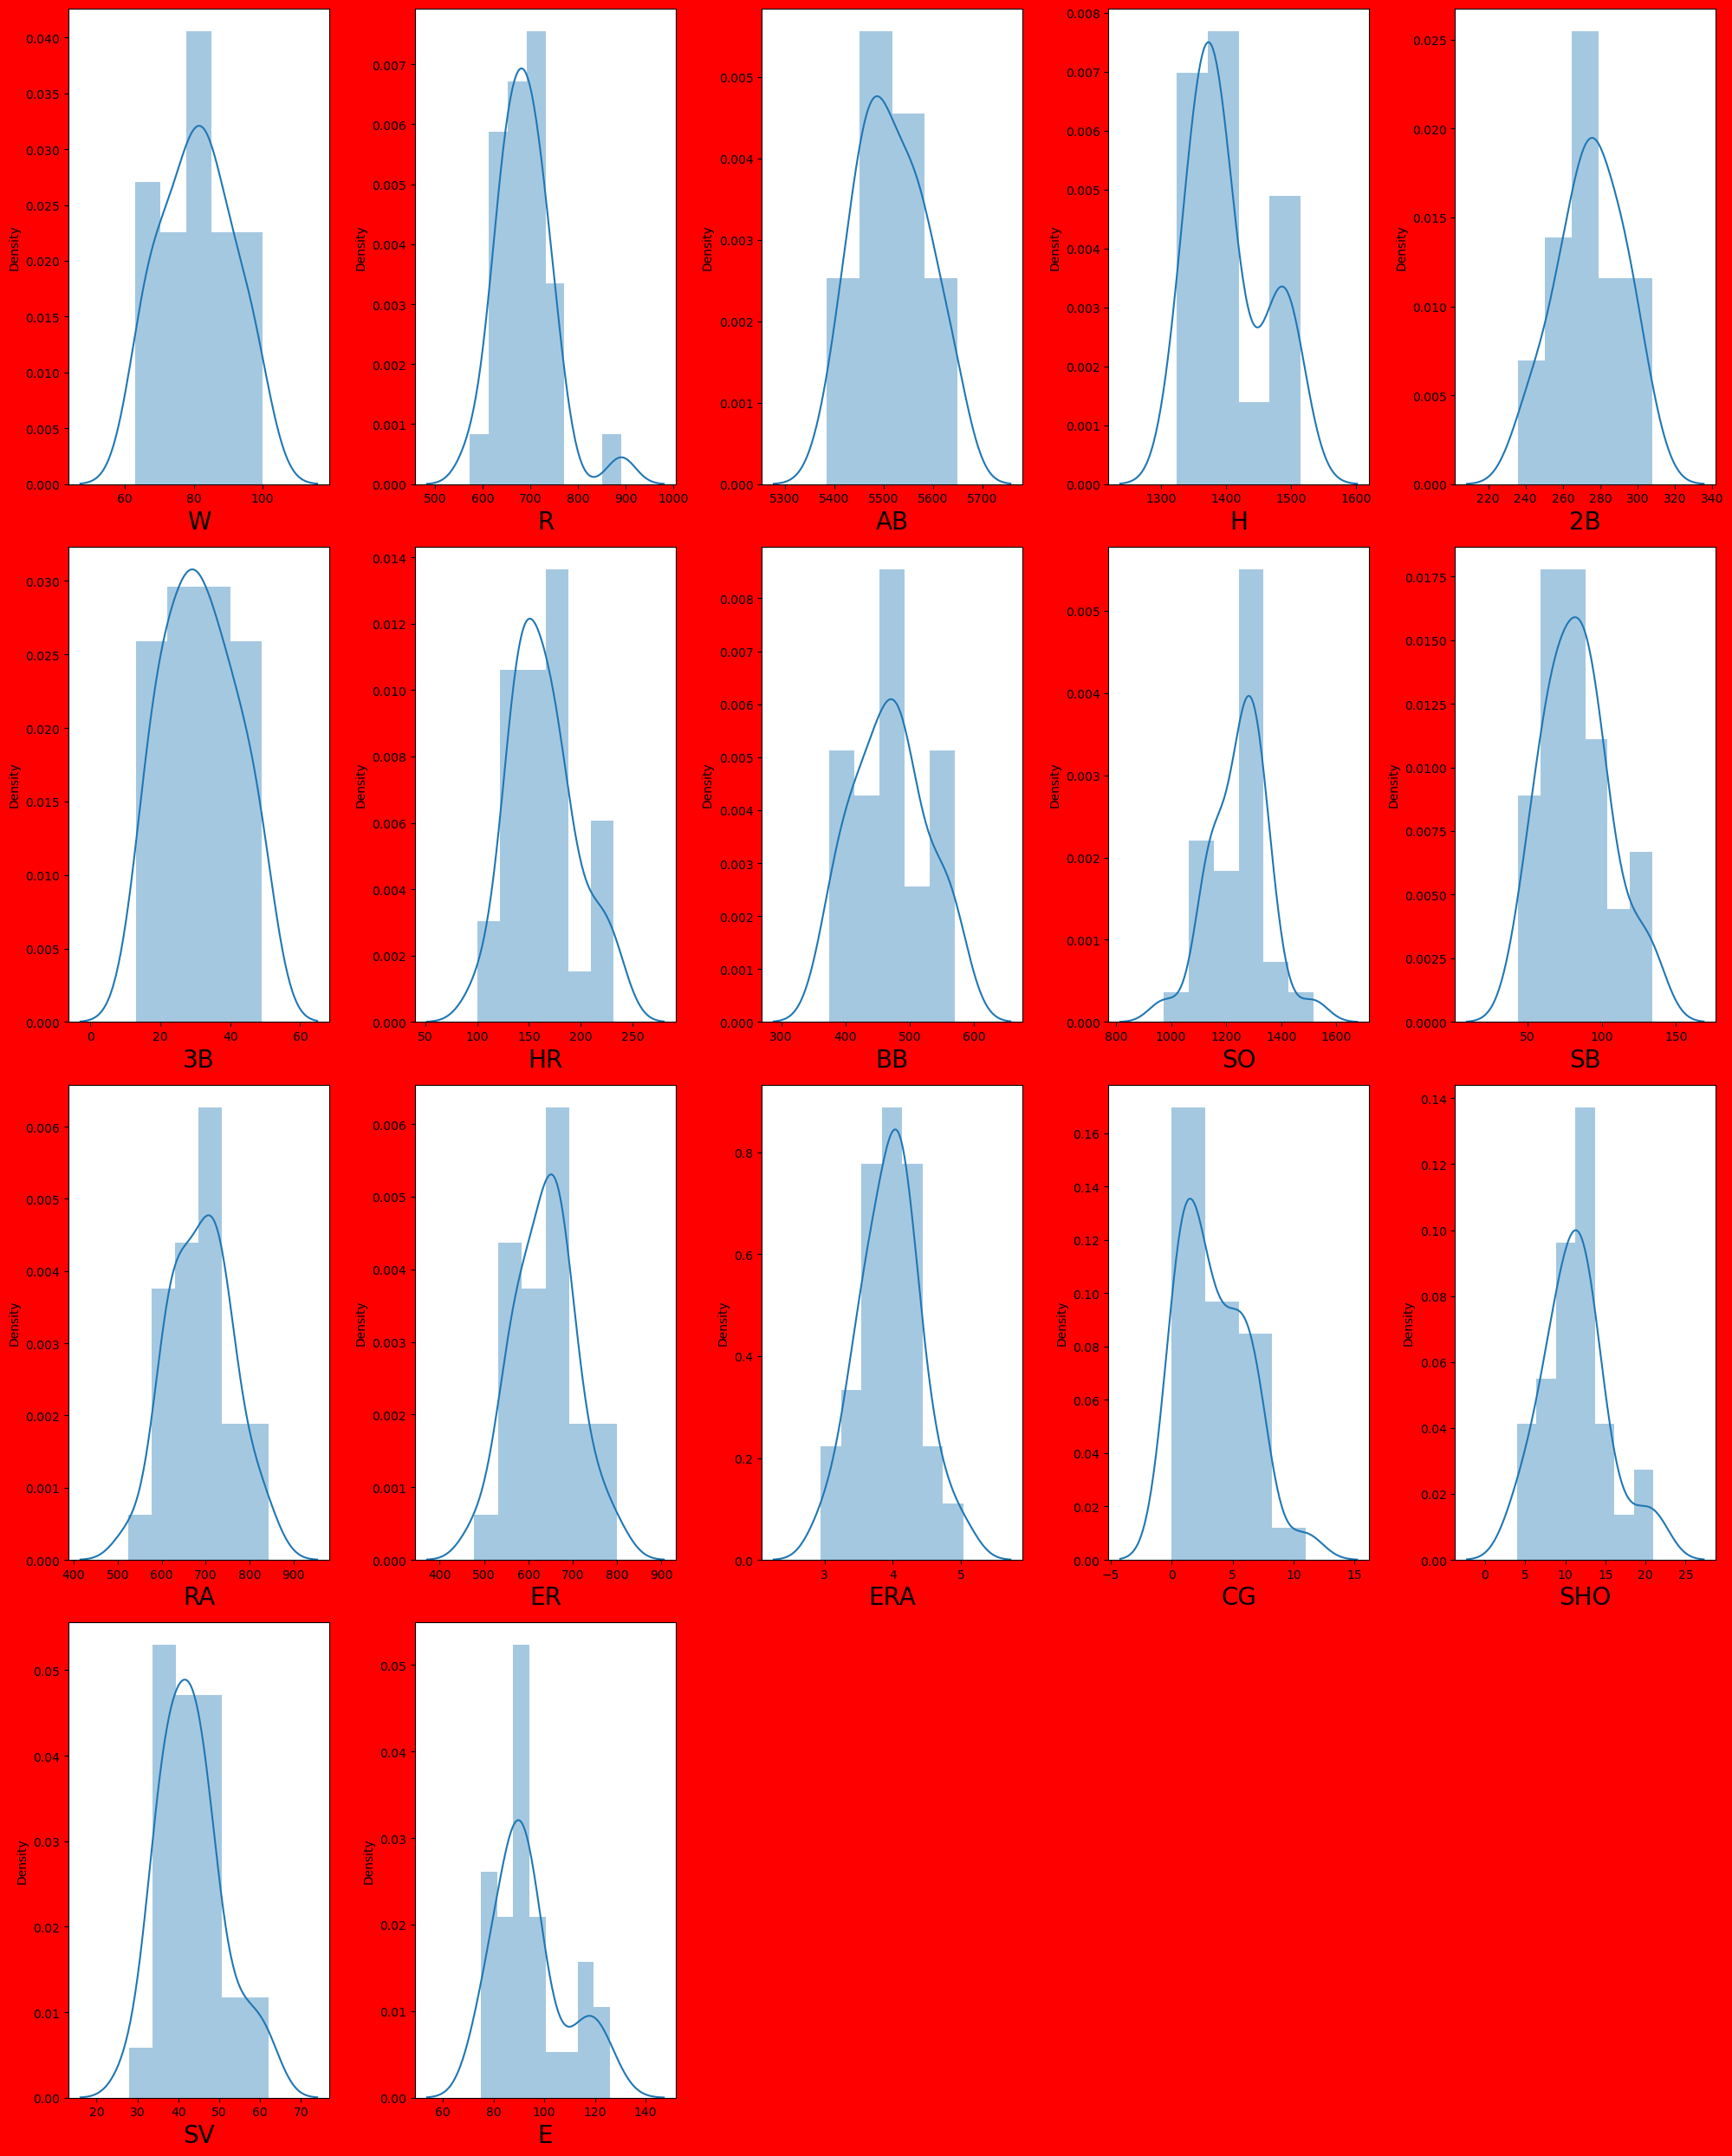

In [21]:
plt.figure(figsize=(20,25),facecolor='red')
plotnum=1
for column in data:
    if plotnum<=17:
        ax= plt.subplot(4,5,plotnum)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnum+=1
    
plt.tight_layout()

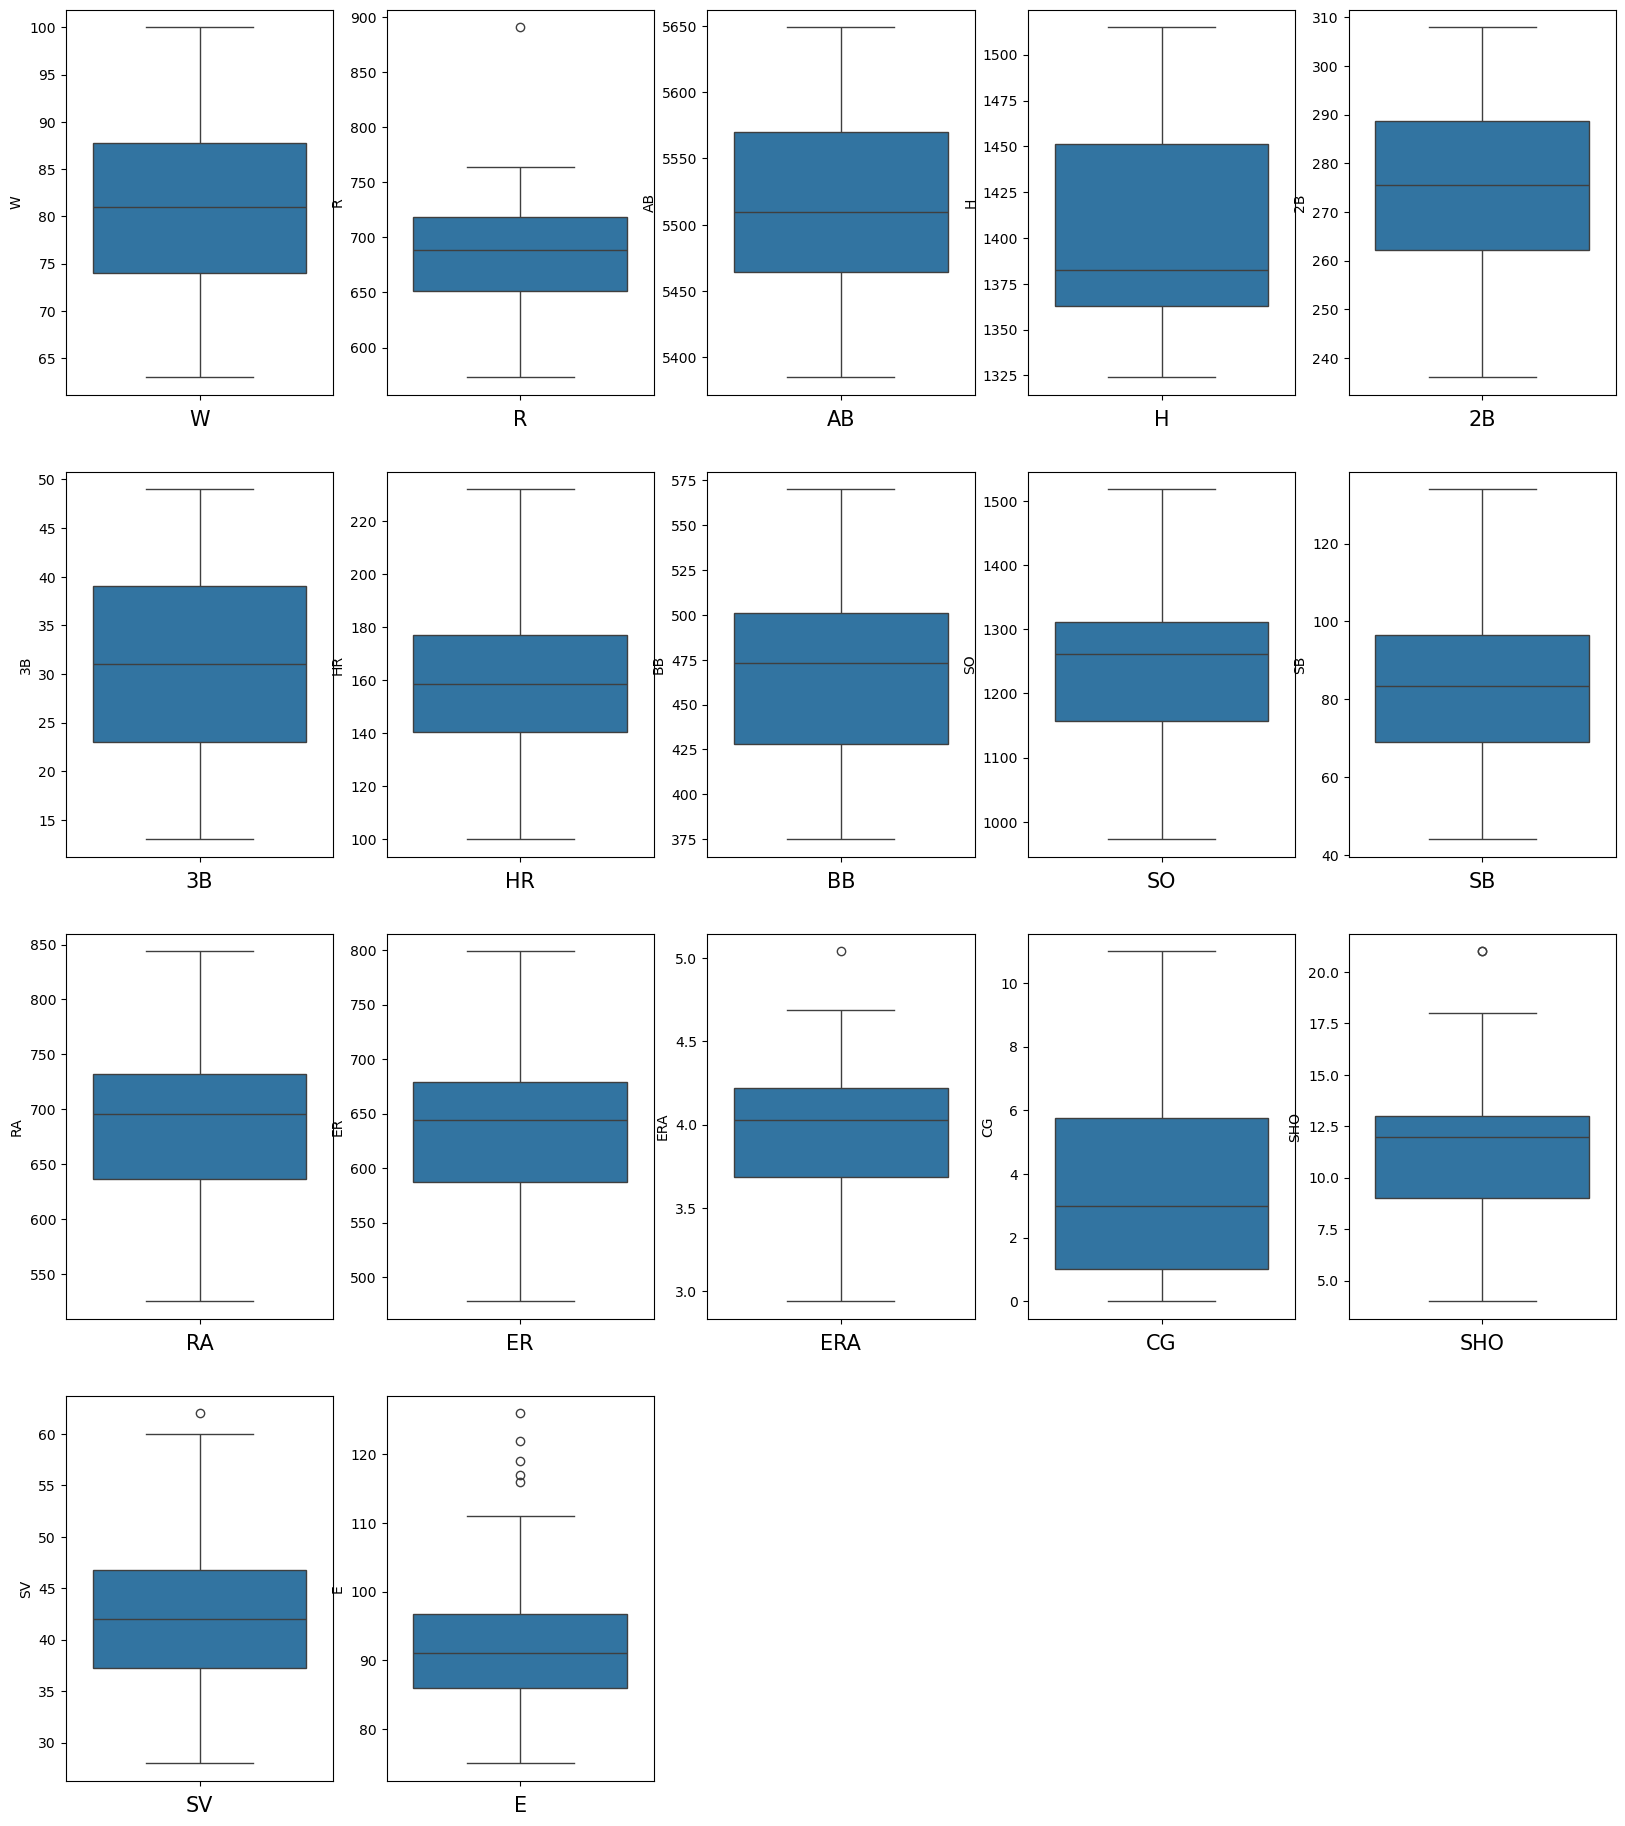

In [22]:
plt.figure(figsize=(20,23))
graph=1
for column in data:
    if graph<=17:
        plt.subplot(4,5,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=15)
    graph+=1
plt.show()

In [23]:
x = data.drop('W', axis=1)
y = data['W']

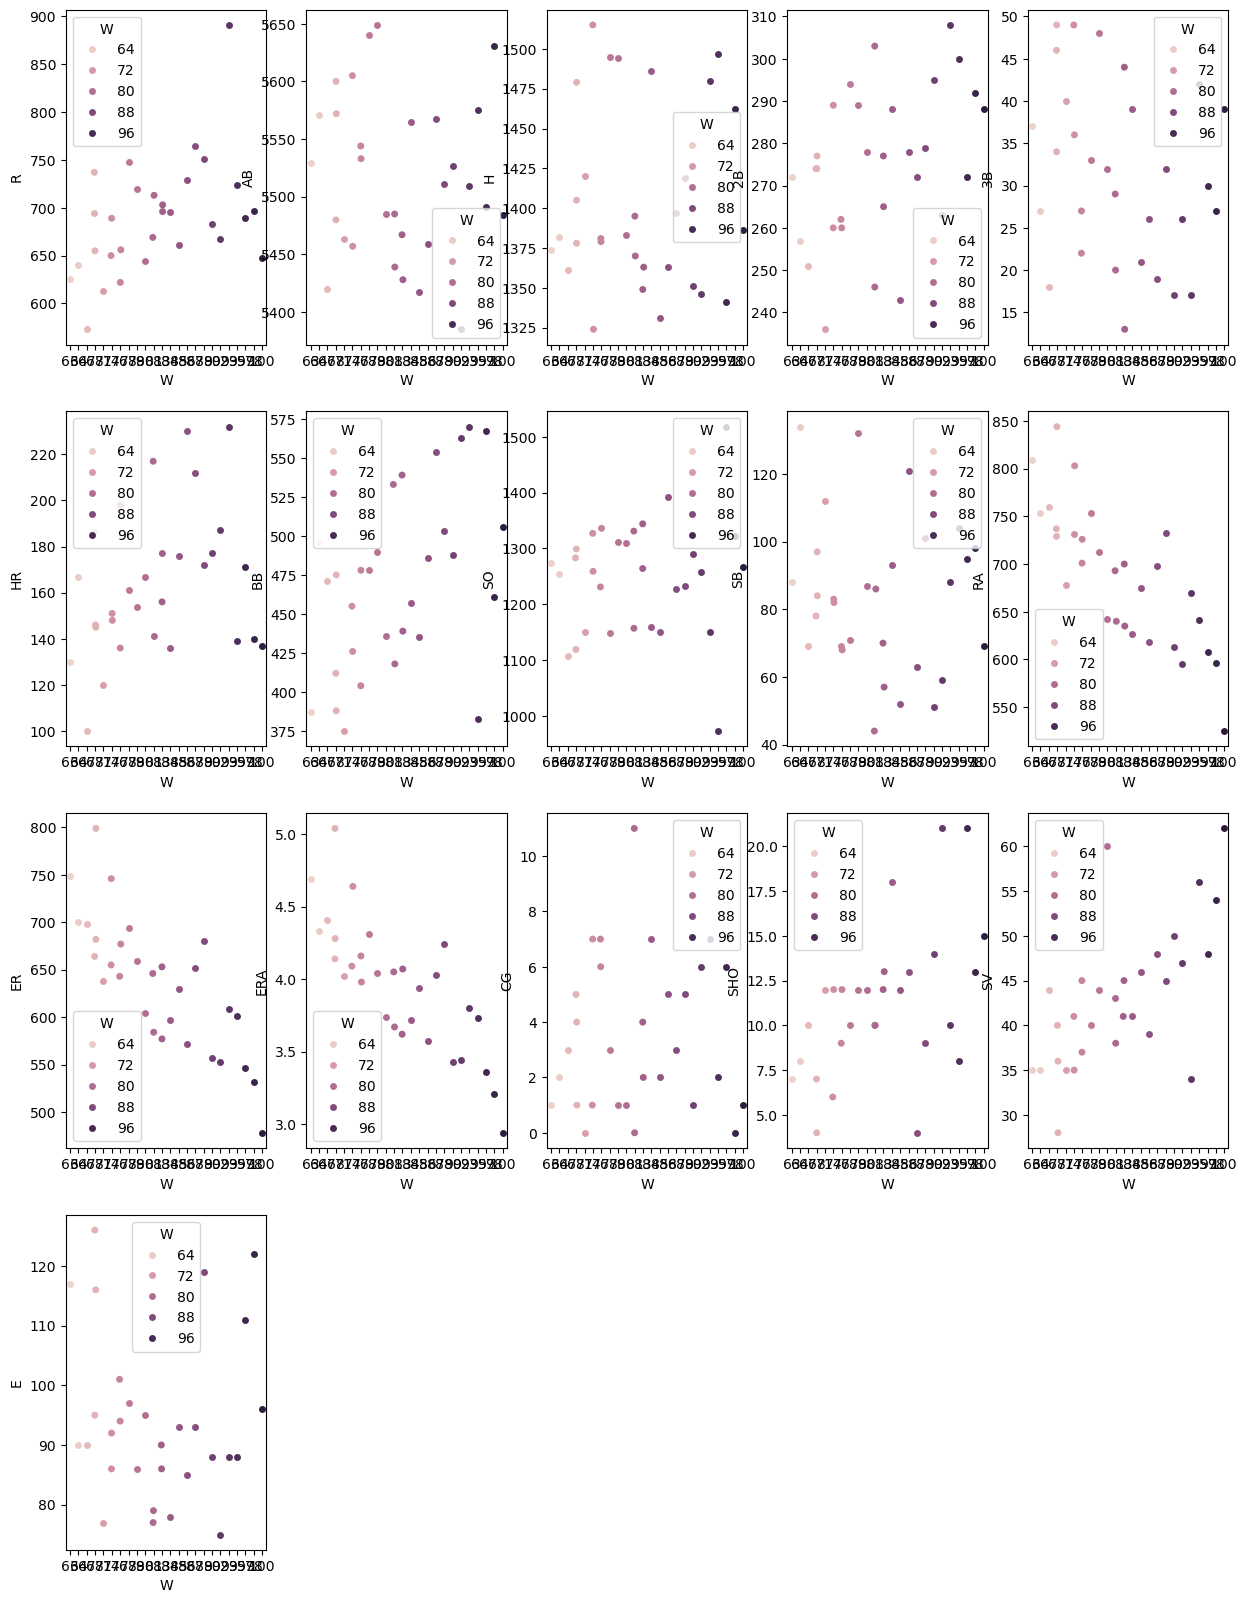

In [24]:
plt.figure(figsize=(15,20))
plotnumber = 1
for column in x:
    if plotnumber <=17:
        ax = plt.subplot(4,5, plotnumber)
        sns.stripplot(x=y, y=x[column],hue=y)
    plotnumber+=1
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [27]:
x_scaler


array([[ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.50695519, -0.5398062 , -0.81462859,  1.67160651,
        -0.46146963],
       [ 0.13443166, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985,  0.25459752, -0.5398062 ,  0.1728    ,  0.24987932,
        -0.60719689],
       [-0.33290586, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313, -0.64134684,  2.77264091, -0.32091429, -0.65485616,
        -1.11724227],
       [-1.14641931,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217,  0.05301004,  1.3004422 , -0.56777144, -0.78410408,
         0.48575751],
       [ 0.01327008,  1.28073815,  1

In [31]:
x_train, x_test,y_train, y_test= train_test_split(x_scaler,y,test_size=0.25, random_state=355)
y_train.head()

12     85
6      87
15    100
28     74
23     67
Name: W, dtype: int64

In [32]:
# Train the model
# Create the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [33]:
# Evaluate the model
LinearRegression()

LinearRegression()

In [34]:
model.score(x_train,y_train)

0.9644154312132855

In [35]:
model.score(x_test,y_test)

0.2817537324006977

In [36]:
 x_test[1]

array([ 1.08641548, -0.07601676,  0.2753031 ,  0.23981814,  0.06811543,
        0.26740453,  0.6043344 , -0.14899698,  0.78014427,  0.63144119,
        0.64045058,  0.63537388,  0.56434284, -0.56777144,  0.24987932,
        1.79730279])

In [37]:
y_pred=model.predict(x_test)

In [38]:
y_pred

array([71.13638863, 92.96076223, 91.68537588, 73.13784324, 76.46610682,
       77.37351957, 70.87961285, 97.3059604 ])

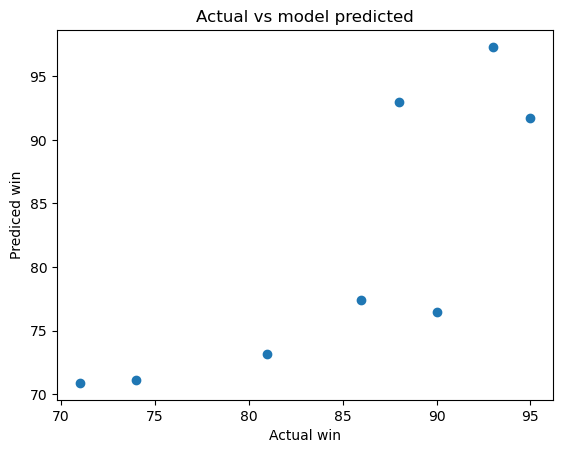

In [39]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual win')
plt.ylabel('Prediced win')
plt.title('Actual vs model predicted')
plt.show()

In [40]:
##model evaluation
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [41]:
y_pred=model.predict(x_test)

In [42]:
 mean_absolute_error(y_test,y_pred)

5.698484455457784

In [43]:
mean_squared_error(y_test,y_pred)

47.718486403628646

In [44]:
np.sqrt(mean_squared_error(y_test,y_pred))

6.907856860389382

In [45]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [46]:
lasscv=LassoCV(alphas= None, max_iter=10)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=10)

In [47]:
alpha=lasscv.alpha_
alpha

0.5293927411271306

In [50]:
lass_reg=Lasso(alpha)
lass_reg.fit(x_train, y_train)

Lasso(alpha=0.5293927411271306)

In [51]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)


In [52]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
